In [1]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para tratar os dados em formato de dataframe
import numpy as np # biblioteca utilizada para tratar vetores e matrizesimport matplotlib.pyplot as plt  #utilizapa para construir os gráficos em um formato similar ao "Matlab"
from sklearn.preprocessing import MinMaxScaler, LabelEncoder #utilizada para realizar o preprocessamento dos dados
from sklearn.model_selection import train_test_split #utilizada para realizar o divisão entre dados para treinamento e teste
from sklearn.metrics import confusion_matrix, accuracy_score #utilizada para verificar a acurácia do modelo construído
from sklearn.naive_bayes import GaussianNB # utilizada para construir o modelo de classificação naive_bayes
import seaborn as sns #utilizada para constuir os gráficos em uma forma mais "bonita"
import matplotlib.pyplot as plt #biblioteca para realizar a construção dos gráficos
from sklearn.svm import SVC #utilizada para importar o algoritmo SVM

In [6]:
#lendo o dataset no formato de um dataframe: comp_bikes_mod.csv
dataset = pd.read_csv('D:/Documentos/Bootcamp IGTI ML/Notebooks/Desafio Mod1/comp_bikes_mod.csv', sep=',') #realiza a leitura do banco de dados

In [7]:
#apresentando as 5 primeiras linhas do dataset
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [8]:
dataset.shape # mostra a dimensão do dataset

(17379, 17)

In [9]:
#conhecendo o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [10]:
#verificando a quantidade de valores nulos por variável (atributo)
dataset.isnull().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

In [11]:
#apresentando um resumo descritivo do dataset
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000




---


# **Criando a base de dados sem os nulos da coluna dteday**



In [13]:
#lendo o dataset no formato de um dataframe
dataset_null = pd.read_csv('D:/Documentos/Bootcamp IGTI ML/Notebooks/Desafio Mod1/comp_bikes_mod.csv', sep=',') #realiza a leitura do banco de dados

In [14]:
dataset_null.shape

(17379, 17)

Deletando as linhas que possuem valores nulos para a coluna dteday

In [15]:
#deletando as linhas que possuem algum valor nulo
dataset_null.dropna(subset=['dteday'], inplace=True)

In [16]:
#apresentando um resumo do dataset sem valores nulos para dteday
dataset_null.shape

(15641, 17)

In [17]:
dataset_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [18]:
dataset_null.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [19]:
#alterando a coluna dteday para datetime
dataset_null['dteday']=pd.to_datetime(dataset_null['dteday'])

In [20]:
dataset_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  float64       
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [21]:
dataset_null['dteday'].max()   #última data da coluna dteday:

Timestamp('2012-12-31 00:00:00')

**Transformando o atributo season em categorica:**

In [22]:
dataset_null['season']=pd.Categorical(dataset_null['season'])

In [23]:
dataset_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  category      
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [24]:
dataset_null['season'].value_counts()

3.0    3623
2.0    3523
4.0    3478
1.0    3437
Name: season, dtype: int64

In [25]:
dataset_null.describe()

,instant,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Matriz de correlação entre as variáveis "season", "temp", "atemp", "hum", "windspeed", "cnt"**

In [26]:
dataset_corr=dataset_null.copy(deep=True)  #criando uma cópia do dataset

In [27]:
dataset_corr.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [28]:
#deixando apenas com as colunas para fazer a correlação
drop=["instant", "dteday", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit", "casual", "registered"]
dataset_corr.drop(drop, inplace=True, axis=1)

In [34]:
#Cálculo da correlação para as variáveis selecionadas
corr=dataset_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.988102,-0.069887,-0.016022,0.405867
atemp,0.988102,1.000000,-0.054224,-0.058803,0.403810
hum,-0.069887,-0.054224,1.000000,-0.289859,-0.323409
windspeed,-0.016022,-0.058803,-0.289859,1.000000,0.091747
cnt,0.405867,0.403810,-0.323409,0.091747,1.000000


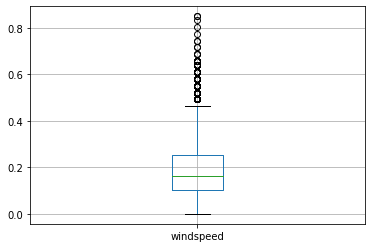

In [36]:
#identificando possíveis outliers
dataset_null[['windspeed']].boxplot()



---



# **Regressão e Árvore de Decisão**

usar a base de dados com o tratamento de valores nulas das coluna hum, cnt e casual para regressão e árvores de decisão:

In [37]:
#lendo o dataset no formato de um dataframe
dataset_modelos = pd.read_csv('D:/Documentos/Bootcamp IGTI ML/Notebooks/Desafio Mod1/comp_bikes_mod.csv', sep=',') #realiza a leitura do banco de dados

In [38]:
#Preenchendo os valores nulos das colunas "hum","cnt" e "casual" com os valores médios.
dataset_modelos["hum"].fillna(dataset_modelos["hum"].mean(), inplace=True) #substituindo os valores nulos pela média da coluna
dataset_modelos["cnt"].fillna(dataset_modelos["cnt"].mean(), inplace=True) #substituindo os valores nulos pela média da coluna
dataset_modelos["casual"].fillna(dataset_modelos["casual"].mean(), inplace=True) #substituindo os valores nulos pela média da coluna

In [39]:
dataset_modelos.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


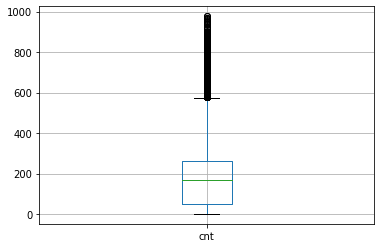

In [40]:
dataset_modelos[['cnt']].boxplot()

**Análise de Regressão**

In [41]:
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [42]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [43]:
#realizando a análise de regressão
x = dataset_modelos.loc[:,['hum','casual']].values
y = dataset_modelos.iloc[:, 16].values #variável dependente

In [44]:
#Dividindo o dataset entre treinamento 80% e teste 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [45]:
x_train.shape, x_test.shape

((13903, 2), (3476, 2))

In [46]:
y_train.shape, y_test.shape

((13903,), (3476,))

In [47]:
#Realiza a construção do modelo de regressão com os dados de treino
reg= LinearRegression()
#x_train_Reshaped=x_train.reshape(-2, 2) #coloca os dados no formato 2D
regressao= reg.fit (x_train,y_train) # encontra os coeficientes (realiza a regressão)

In [48]:
#realiza a previsão
previsao=reg.predict(x_test)

In [49]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(y_test, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Y = [-104.46054184    2.18444819]X 177.74781932890795
Coeficiente de Determinação (R2): 0.407248711070358


R2 = 0,407  para a análise de regressão

**Árvore de Regressão**

In [50]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [51]:
arvore_reg = DecisionTreeRegressor()   #instanciando
arvore_reg.fit(x_train,y_train)        #construindo o modelo

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [52]:
previsao_arv = arvore_reg.predict(x_test)   #calculando a previsão
print('Erro Absoluto:', metrics.mean_absolute_error(y_test,previsao_arv))
print('Erro quadratico:', metrics.mean_squared_error(y_test,previsao_arv))

Erro Absoluto: 103.3677994167946
Erro quadratico: 23135.745231943885


In [53]:
R_2_arv = r2_score(y_test, previsao_arv)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2_arv)

Coeficiente de Determinação (R2): 0.21534011124446517


R2 = 0,215  para a árvore de regressão

**Regressão com todos os dados**

In [54]:
#Realiza a construção do modelo de regressão com os dados completos
reg2= LinearRegression()
#x_train_Reshaped=x_train.reshape(-2, 2) #coloca os dados no formato 2D
regressao= reg2.fit (x,y) # encontra os coeficientes (realiza a regressão)

In [55]:
#realiza a previsão
previsao2=reg2.predict(x)

In [56]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg2.coef_,reg2.intercept_))

R_2_reg2 = r2_score(y, previsao2)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2_reg2)

Y = [-100.98900093    2.20087962]X 174.98415936102265
Coeficiente de Determinação (R2): 0.40561165206692495


R2 = 0,4056  para a análise de regressão com todos os dados

**Árvore de Decisão com todos os dados**

In [57]:
arvore_reg2 = DecisionTreeRegressor()   #instanciando
arvore_reg2.fit(x,y)        #construindo o modelo

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [58]:
previsao_arv2 = arvore_reg2.predict(x)   #calculando a previsão

In [59]:
R_2_arv2 = r2_score(y, previsao_arv2)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2_arv2)

Coeficiente de Determinação (R2): 0.6973174287156154


R2 = 0,697  para a árvore de regressão com todos os dados